# Proyek Analisis Data: Bike-sharing-dataset
- Nama: Emila Khoirunnisa
- Email: emilaemil04@gmail.com
- Id Dicoding: emila30

## Menentukan Pertanyaan Bisnis
- Bagaimana hubungan antara cuaca (weathersit), suhu (temp),dan kecepatan angin (windspeed) dengan jumlah sepeda yang disewa per jam?
- Apakah perbedaan pola peminjaman sepeda antara hari libur dan hari kerja pada sepeda yang disewa per hari?
- Bagaimana korelasi antara variabel cuaca (weathersit, suhu, kecepatan angin) dengan jumlah total sepeda yang dipinjam per hari?
- Apakah terdapat perbedaan pola peminjaman sepeda antara tahun 2011 dan 2012 pada sepeda yang disewa per hari?
- Apakah terdapat pola peminjaman sepeda yang berbeda di setiap musim (springer, summer, fall, winter) pada sepeda yang disewa per jam?

## Menyiapkan semua library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel day

In [3]:
day = pd.read_csv("data/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hour

In [4]:
hour = pd.read_csv("data/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai Data day
1. Memeriksa tipe data dari tiap kolom 

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. Memeriksa duplikasi data dan ringkasan parameter statistik dari kolom numerik

In [6]:
print("Jumlah duplikasi: ", day.duplicated().sum())
day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai data hour
1. Memeriksa tipe data dari tiap kolom

In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Memeriksa duplikasi data dan ringkasan parameter statistik dari kolom numerik

In [8]:
print("Jumlah duplikasi: ", hour.duplicated().sum())
hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data


Membersihkan Data day

In [9]:
day.isnull().sum()  # tidak ada missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengganti tipe pada pada kolom dteday menjadi datetime

In [10]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day[column] = pd.to_datetime(day[column])

In [11]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour[column] = pd.to_datetime(hour[column])

In [13]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data day

In [14]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Demografi pelanggan berdasarkan tahun (0: 2011, 1: 2012)

In [15]:
day.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
   nunique   max  min         mean          std
yr                                             
0      365  6043  431  3405.761644  1378.753666
1      366  8714   22  5599.934426  1788.667868

Demografi pelanggan berdasarkan musim (1:springer, 2:summer, 3:fall, 4:winter)

In [16]:
day.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

Melihat persebaran pelanggan berdasarkan holiday (hari libur)

In [17]:
day.groupby(by="holiday").cnt.nunique().sort_values(ascending=False)

holiday
0    679
1     20
Name: cnt, dtype: int64

Melihat persebaran pelanggan berdasarkan weekday

In [18]:
day.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

weekday
0    104
1    104
2    104
5    104
3    103
4    103
6    102
Name: cnt, dtype: int64

Melihat persebaran pelanggan berdasarkan workingday (hari kerja)

In [19]:
day.groupby(by="workingday").cnt.nunique().sort_values(ascending=False)

workingday
1    487
0    223
Name: cnt, dtype: int64

Melihat data suhu tertinggi dan terendah

In [20]:
day.sort_values(by="temp", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
553,554,2012-07-07,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,3392,4840
203,204,2011-07-23,3,0,7,0,6,0,1,0.849167,0.804287,0.500000,0.131221,987,2298,3285
202,203,2011-07-22,3,0,7,0,5,1,1,0.848333,0.840896,0.580417,0.133100,562,2825,3387
209,210,2011-07-29,3,0,7,0,5,1,1,0.838333,0.785967,0.542500,0.174138,670,3176,3846
545,546,2012-06-29,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417,829,4634,5463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
23,24,2011-01-24,1,0,1,0,1,1,1,0.097391,0.117930,0.491739,0.158330,86,1330,1416
22,23,2011-01-23,1,0,1,0,0,0,1,0.096522,0.098839,0.436522,0.246600,150,836,986


Melihat data kelembapan tertinggi dan terendah

In [21]:
day.sort_values(by="hum", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
265,266,2011-09-23,4,0,9,0,5,1,2,0.609167,0.522125,0.972500,0.078367,258,2137,2395
340,341,2011-12-07,4,0,12,0,3,1,3,0.410000,0.400246,0.970417,0.266175,50,655,705
325,326,2011-11-22,4,0,11,0,2,1,3,0.416667,0.421696,0.962500,0.118792,69,1538,1607
339,340,2011-12-06,4,0,12,0,2,1,3,0.462500,0.456400,0.949583,0.232583,126,2468,2594
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,452,2012-03-27,2,1,3,0,2,1,1,0.323333,0.315654,0.290000,0.187192,531,4571,5102
463,464,2012-04-08,2,1,4,0,0,0,1,0.500000,0.492425,0.275833,0.232596,2230,2939,5169
462,463,2012-04-07,2,1,4,0,6,0,1,0.437500,0.426129,0.254167,0.274871,3252,3605,6857
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635


Melihat data kecepatan angin tertinggi dan terendah

In [22]:
day.sort_values(by="windspeed", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
432,433,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
420,421,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,2012-11-26,4,1,11,0,1,1,1,0.313333,0.339004,0.535417,0.046650,337,4750,5087
37,38,2011-02-07,1,0,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408,120,1592,1712
280,281,2011-10-08,4,0,10,0,6,0,1,0.521667,0.513242,0.701250,0.045404,2235,3174,5409
282,283,2011-10-10,4,0,10,1,1,0,1,0.570833,0.542925,0.733750,0.042304,1514,3603,5117


### Explore Data hour

In [23]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Demografi pelanggan berdasarkan tahun (0: 2011, 1: 2012)

In [24]:
hour.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
   nunique  max min        mean         std
yr                                         
0     8645  651   1  143.794448  133.797854
1     8734  977   1  234.666361  208.910941

Demografi pelanggan berdasarkan musim (1:springer, 2:summer, 3:fall, 4:winter)

In [25]:
hour.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
       nunique  max min        mean         std
season                                         
1         4242  801   1  111.114569  119.224010
2         4409  957   1  208.344069  188.362473
3         4496  977   1  236.016237  197.711630
4         4232  967   1  198.868856  182.967972

Melihat persebaran pelanggan berdasarkan holiday (hari libur)

In [26]:
hour.groupby(by="holiday").cnt.nunique().sort_values(ascending=False)

holiday
0    869
1    276
Name: cnt, dtype: int64

Melihat persebaran pelanggan berdasarkan weekday

In [27]:
hour.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

weekday
3    616
6    609
4    606
2    598
1    595
5    584
0    571
Name: cnt, dtype: int64

Melihat persebaran pelanggan berdasarkan workingday

In [28]:
hour.groupby(by="workingday").cnt.nunique().sort_values(ascending=False)

workingday
1    856
0    676
Name: cnt, dtype: int64

Melihat data suhu tertinggi dan terendah

In [29]:
hour.sort_values(by="temp", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13163,13164,2012-07-07,3,1,7,16,0,6,0,1,1.00,0.8636,0.19,0.1642,102,192,294
12972,12973,2012-06-29,3,1,6,17,0,5,1,1,0.98,0.9242,0.34,0.1940,82,457,539
12970,12971,2012-06-29,3,1,6,15,0,5,1,1,0.96,0.9091,0.36,0.0000,47,183,230
13161,13162,2012-07-07,3,1,7,14,0,6,0,2,0.96,0.8636,0.30,0.1343,105,203,308
12969,12970,2012-06-29,3,1,6,14,0,5,1,1,0.96,0.9091,0.36,0.2239,49,184,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,8723,2012-01-04,1,1,1,6,0,3,1,1,0.02,0.0455,0.41,0.1642,0,59,59
8721,8722,2012-01-04,1,1,1,5,0,3,1,1,0.02,0.0455,0.41,0.1940,0,14,14
8720,8721,2012-01-04,1,1,1,4,0,3,1,1,0.02,0.0455,0.41,0.1940,0,2,2
8718,8719,2012-01-04,1,1,1,2,0,3,1,1,0.02,0.0152,0.34,0.2836,0,1,1


Melihat data kelembapan tertinggi dan terendah

In [30]:
hour.sort_values(by="hum", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1473,1474,2011-03-06,1,0,3,17,0,0,0,3,0.34,0.3030,1.0,0.2985,2,23,25
6733,6734,2011-10-13,4,0,10,3,0,4,1,2,0.54,0.5152,1.0,0.1940,2,4,6
2599,2600,2011-04-23,2,0,4,5,0,6,0,3,0.34,0.3636,1.0,0.0000,1,6,7
2598,2599,2011-04-23,2,0,4,4,0,6,0,3,0.34,0.3636,1.0,0.0000,2,3,5
2597,2598,2011-04-23,2,0,4,3,0,6,0,3,0.32,0.3333,1.0,0.0896,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1564,1565,2011-03-10,1,0,3,15,0,4,1,3,0.44,0.4394,0.0,0.2239,3,11,14
1565,1566,2011-03-10,1,0,3,16,0,4,1,3,0.42,0.4242,0.0,0.2537,1,20,21
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1


Melihat data kecepatan angin tertinggi dan terendah

In [31]:
hour.sort_values(by="windspeed", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4315,4316,2011-07-03,3,0,7,17,0,0,0,3,0.80,0.7424,0.49,0.8507,181,177,358
4316,4317,2011-07-03,3,0,7,18,0,0,0,3,0.80,0.7424,0.49,0.8507,74,107,181
5635,5636,2011-08-27,3,0,8,17,0,6,0,3,0.64,0.5758,0.89,0.8358,2,14,16
9956,9957,2012-02-24,1,1,2,21,0,5,1,1,0.42,0.4242,0.35,0.8060,1,151,152
1259,1260,2011-02-25,1,0,2,15,0,5,1,1,0.46,0.4545,0.41,0.8060,5,50,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,4708,2011-07-20,3,0,7,1,0,3,1,1,0.70,0.6667,0.84,0.0000,4,7,11
12418,12419,2012-06-06,2,1,6,15,0,3,1,1,0.64,0.6212,0.38,0.0000,75,225,300
4704,4705,2011-07-19,3,0,7,22,0,2,1,1,0.74,0.7121,0.74,0.0000,36,120,156
12417,12418,2012-06-06,2,1,6,14,0,3,1,1,0.64,0.6212,0.38,0.0000,111,191,302


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara cuaca (weathersit), suhu (temp),dan kecepatan angin (windspeed) dengan jumlah sepeda yang disewa per jam?

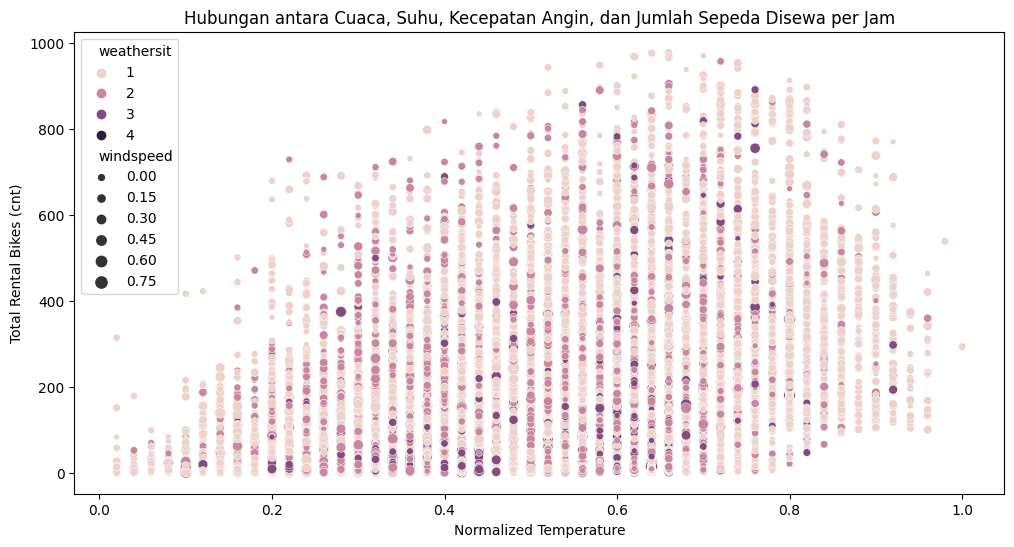

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', hue='weathersit', size='windspeed', data=hour)
plt.title('Hubungan antara Cuaca, Suhu, Kecepatan Angin, dan Jumlah Sepeda Disewa per Jam')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rental Bikes (cnt)')
plt.show()

### Pertanyaan 2: Apakah perbedaan pola peminjaman sepeda antara hari libur dan hari kerja pada sepeda yang disewa per hari?

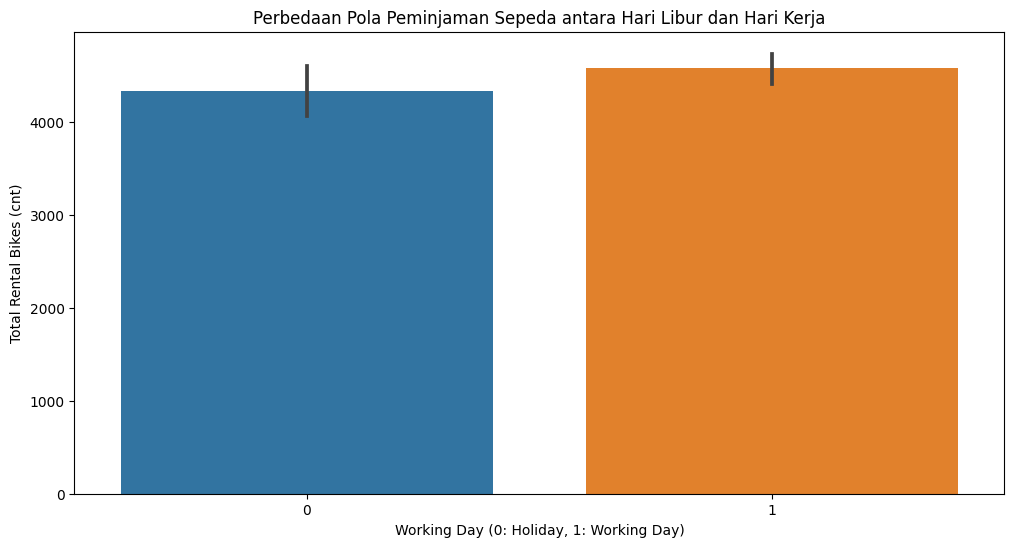

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='workingday', y='cnt', data=day)
plt.title('Perbedaan Pola Peminjaman Sepeda antara Hari Libur dan Hari Kerja')
plt.xlabel('Working Day (0: Holiday, 1: Working Day)')
plt.ylabel('Total Rental Bikes (cnt)')
plt.show()

### Pertanyaan 3: Bagaimana korelasi antara variabel cuaca (weathersit, suhu, kecepatan angin) dengan jumlah total sepeda yang disewa per hari?

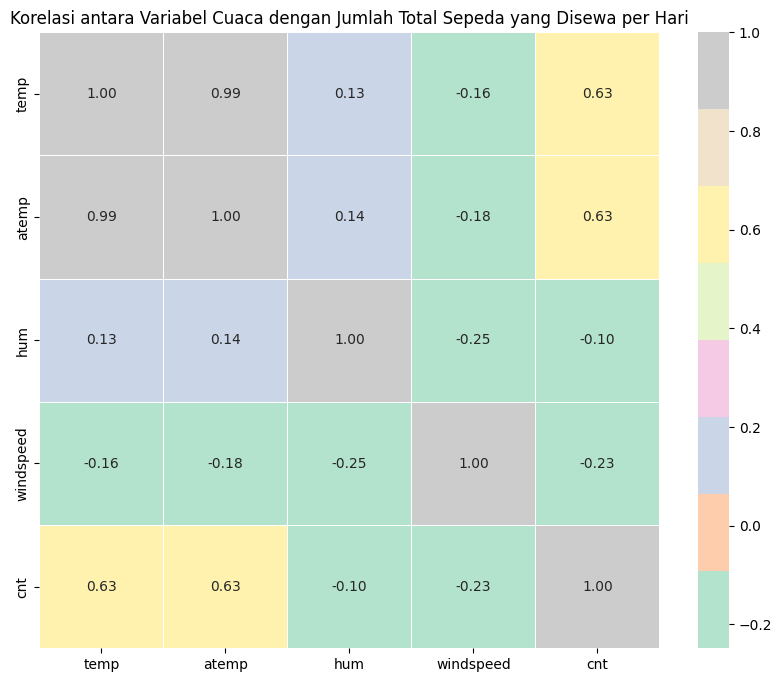

In [34]:
correlation_matrix = day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel2', fmt='.2f', linewidths=.5)
plt.title('Korelasi antara Variabel Cuaca dengan Jumlah Total Sepeda yang Disewa per Hari')
plt.show()

### Pertanyaan 4: Apakah terdapat perbedaan pola peminjaman sepeda antara tahun 2011 dan 2012 pada sepeda yang disewa per hari?

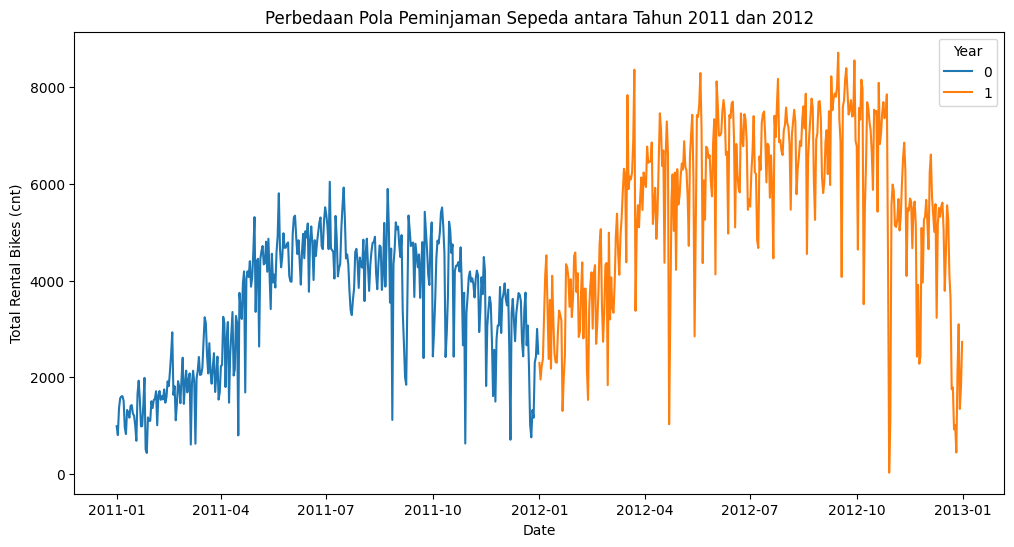

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', hue='yr', data=day)
plt.title('Perbedaan Pola Peminjaman Sepeda antara Tahun 2011 dan 2012')
plt.xlabel('Date')
plt.ylabel('Total Rental Bikes (cnt)')
plt.legend(title='Year')
plt.show()

### Pertanyaan 5: Apakah terdapat pola peminjaman sepeda yang berbeda di setiap musim (springer, summer, fall, winter) pada sepeda yang disewa per jam?

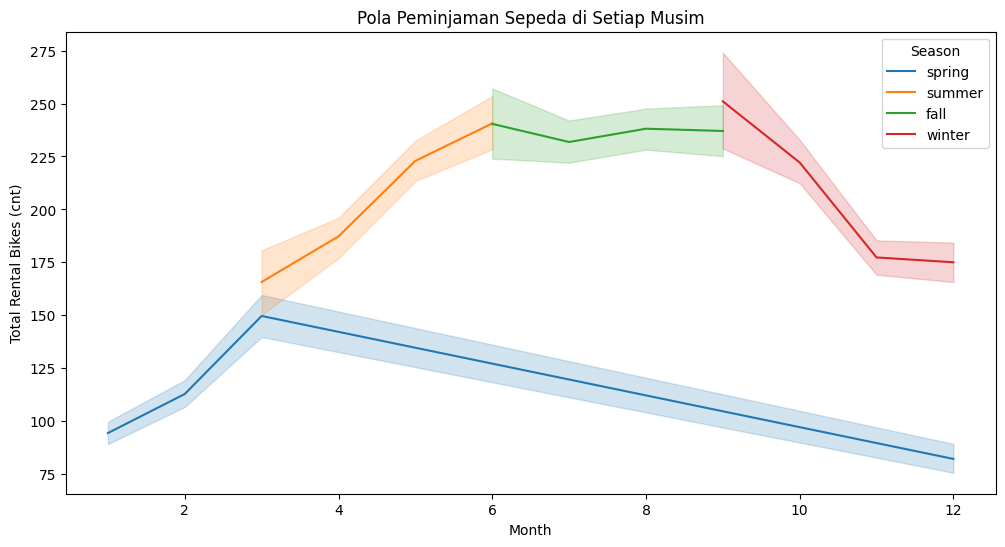

In [36]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
hour['season_label'] = hour['season'].map(season_mapping)

plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='season_label', data=hour)
plt.title('Pola Peminjaman Sepeda di Setiap Musim')
plt.xlabel('Month')
plt.ylabel('Total Rental Bikes (cnt)')
plt.legend(title='Season')
plt.show()

## Conclusion

#### 1. Bagaimana hubungan antara cuaca (weathersit), suhu (temp),dan kecepatan angin (windspeed) dengan jumlah sepeda yang disewa per jam?
Titik-titik pada scatter plot dikelompokkan berdasarkan kondisi cuaca (weathersit), dengan warna yang berbeda untuk setiap kelompok. Terlihat variasi dalam jumlah sepeda yang disewa tergantung pada suhu (temp). Ada kecenderungan peningkatan jumlah sepeda yang disewa ketika suhu naik. Ukuran titik pada scatter plot merepresentasikan kecepatan angin (windspeed), namun belum terlihat pola yang jelas terkait dengan kecepatan angin.

#### 2. Apakah perbedaan pola peminjaman sepeda antara hari libur dan hari kerja pada sepeda yang disewa per hari?
Terlihat bahwa pada hari kerja (workingday=1), jumlah sepeda yang dipinjam cenderung lebih tinggi dibandingkan dengan hari libur (holiday=0).

#### 3. Bagaimana korelasi antara variabel cuaca (weathersit, suhu, kecepatan angin) dengan jumlah total sepeda yang dipinjam per hari?
Berkorelasi Positif: 
- Suhu (temp) dan suhu yang dirasakan (atemp): Semakin tinggi suhu, semakin banyak sepeda yang dipinjam.
- Musim (season): Musim tertentu dapat memengaruhi jumlah peminjaman sepeda.

Berkorelasi Negatif: 
- Kecepatan angin (windspeed) dan kondisi cuaca (weathersit): Kecepatan angin tinggi dan kondisi cuaca buruk berkorelasi dengan penurunan peminjaman sepeda.

Tidak Berkorelasi:
- Hari libur (holiday), hari kerja (workingday), dan weekday: Tidak memiliki korelasi yang signifikan dengan jumlah sepeda yang dipinjam harian.

#### 4. Apakah terdapat perbedaan pola peminjaman sepeda antara tahun 2011 dan 2012 pada sepeda yang disewa per hari?
Grafik menunjukkan adanya perbedaan pola peminjaman sepeda antara tahun 2011 dan 2012. Tren umum peminjaman sepeda pada tahun 2012 cenderung lebih tinggi dibandingkan dengan tahun 2011.


#### 5. Apakah terdapat pola peminjaman sepeda yang berbeda di setiap musim (springer, summer, fall, winter) pada sepeda yang disewa per jam?
Visualisasi pola peminjaman sepeda di setiap musim menunjukkan bahwa musim memiliki dampak signifikan terhadap aktivitas peminjaman. Puncak peminjaman terjadi selama musim dingin, dengan tingkat minat yang tertinggi pada bulan september. Musim panas juga menunjukkan aktivitas tinggi, meskipun sedikit lebih rendah daripada musim dingin. Musim gugur memiliki tingkat peminjaman yang cukup baik, sementara musim semi mencatat penurunan yang signifikan dalam jumlah sepeda yang dipinjam.

## RFM ANALYSIS

In [40]:
rfm_df = day.groupby(by="instant", as_index=False).agg({
    "dteday": "max",        # mengambil tanggal order terakhir
    "cnt": ["sum", "nunique"],               # Total number of rentals
})
rfm_df.columns = ["instant", "last_rental_date", "monetary", "frequency"]


rfm_df["last_rental_date"] = rfm_df["last_rental_date"].dt.date
recent_date = day["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["last_rental_date"].apply(lambda x: (recent_date - x).days)

# Drop 'last_rental_date' column
rfm_df.drop("last_rental_date", axis=1, inplace=True)

# Display the RFM dataframe
print(rfm_df.head())

   instant  monetary  frequency  recency
0        1       985          1      730
1        2       801          1      729
2        3      1349          1      728
3        4      1562          1      727
4        5      1600          1      726


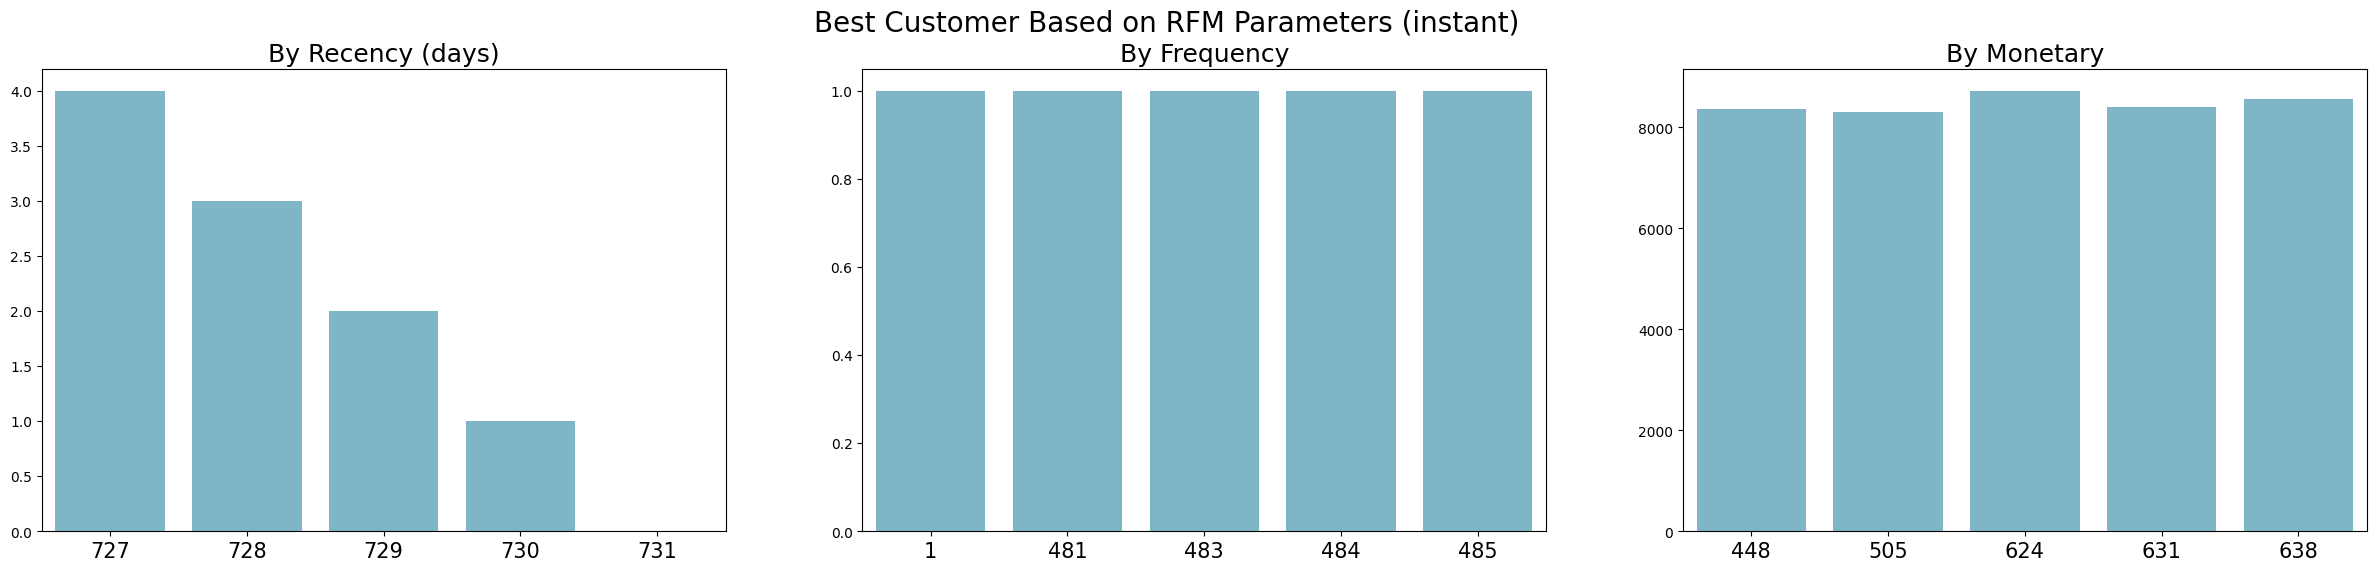

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Visualization by Recency
sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

# Visualization by Frequency
sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Visualization by Monetary
sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (instant)", fontsize=20)
plt.show()

### Analysis Lanjutan
- Instant: Nomor unik yang menunjukkan urutan transaksi atau interaksi. Bisa diabaikan untuk analisis RFM.
- Monetary: Nilai dalam kolom ini menunjukkan seberapa banyak uang yang dihabiskan oleh pelanggan pada setiap transaksi atau interaksi.
- Frequency: Nilai dalam kolom ini menunjukkan seberapa sering pelanggan berinteraksi atau melakukan pembelian.
- Recency: Nilai dalam kolom ini menunjukkan seberapa baru pelanggan telah berinteraksi atau melakukan pembelian, dihitung dalam satuan waktu tertentu (misalnya, hari).

In [39]:
day.to_csv("main_data.csv", index=False)